Same as shearing_flow_2D.ipynb but uses Tensorflow version of solver

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()

from advection_solver.advection_tensorflow import vanleer_tendency_2d

In [2]:
def deformational_flow(x, y, t):
    '''
    Compute 2d divergence-free, deformational flow
    
    Args:
      x, y: 2d numpy arrasy, spatial coordinate
      y: float, time stamp

    Returns:
      u, v: 2d numpy arrays, wind velocity
    '''
    t_period=5  # period for periodic motion
    u = np.sin(np.pi*x)**2 * np.sin(2*np.pi*y) * np.cos(np.pi*t/t_period)
    v = -np.sin(np.pi*y)**2 * np.sin(2*np.pi*x) * np.cos(np.pi*t/t_period)
    return u, v

In [3]:
nx = 100
ny = 100
Lx = 1
Ly = 1
dx = Lx/nx
dy = Ly/ny

x, y = np.meshgrid(dx * np.arange(nx), dy * np.arange(ny))

u, v = deformational_flow(x, y, 0)

# cosine bell as initial condition
r = np.clip(4*np.sqrt((x-0.25)**2+(y-0.25)**2), a_min=None, a_max=1)
c0 = 0.5*(1+np.cos(np.pi*r))

In [4]:
dt = 0.01
nt = 250  # t=2.5, the most stretched state. Will then revert back

# TF solution
c_tensor = tf.convert_to_tensor(c0)

for i in range(nt):
    t = dt*i
    u, v = deformational_flow(x, y, t)
    u_tensor = tf.convert_to_tensor(u)
    v_tensor = tf.convert_to_tensor(v)
    c_tensor += vanleer_tendency_2d(c_tensor, u_tensor, v_tensor, dx, dy, dt, flip_dim=False)

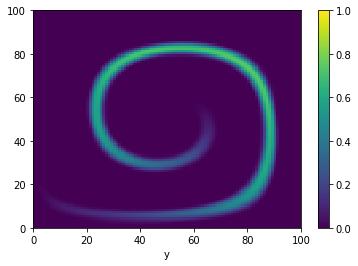

In [5]:
plt.pcolormesh(c_tensor, vmin=0, vmax=1)
plt.xlabel('x')
plt.xlabel('y')
plt.colorbar()
